Name: Edicson Santiago Bonilla Diaz

Student ID: 21252254

### Convolutional Neural Networks (CNNs)

I just adapted a code from an etivity where we were classifing cats and dogs images. I'm using on this code images of **waveforms (time domain)** as input.

I used a couple of images and copied and pasted them multiple times to create the training and testing datasets. I'm concious this is not correct, but just wanted to tease the code and get familiar again with this packages. I need to figure out if I can create a dataset well labelled in a short term using equipment on my office. 

I used [Keras deep learning framework](https://www.tensorflow.org/api_docs/python/tf/keras) which is a high level framework that will allow you to implement CNNs with minimal code. You can see that this implementation is part of tensorflow. We will leave our manual implementations behind and use Keras to train and test a small CNN that can identify fault and no fault bearings.

### Setting up the Python environment


In [10]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import PIL # actually from the 'pillow' package

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import image

## Convolutional Neural Network

### Introduction

In this final task, we will use the Keras framework to setup a simple CNN topology to train a model to separate images of cats and dogs with minimal code.

Our model will implement the following layers:
- an input layer that accepts 3-channel (RGB) 64x64 images
- a convolution layer with 32 individual 3x3 convolution kernels, and a 'ReLU' activation function
- a 2x2 max-pooling layer with a stride of 2
- a 'flattening' layer that simply transforms our 32 activation maps into a flat numerical vector
- a dense layer (like an ANN hidden layer) with 128 nodes and a 'ReLU' activation function.
- a final dense layer as our output with a single node and a sigmoid activation (binary classification problem).

We will use the adam optimiser, binary crossentropy as a loss function, and we will want accuracy to be shown as a metric.

### Coding

[Sequential model guide](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), and the [Image preprocessing page](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential).



In [3]:
# define network topology
net = Sequential()

net.add(Conv2D( filters=32, kernel_size=3, activation="relu", input_shape=(64,64,3) ))
net.add(MaxPooling2D( pool_size= (2,2), strides= 2))
net.add(Flatten())
net.add(Dense( units=128, activation="relu" ))
net.add(Dense( units=1, activation="sigmoid" ))

net.compile(optimizer = "Adam", loss = tf.keras.losses.BinaryCrossentropy(), metrics = 'accuracy')
        

In [4]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3936384   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


Training and testing data has been prepared in advance, and can be found in the following folders:

- data/bearing_fault/training_set/ contains two folders: fault/ and no_fault/ which each contains individual jpeg images to be used for training.
- data/bearing_fault/test_set/ contains two folders: fault/ and no_fault/ which each contains individual jpeg images to be used for testing.

We'll use some of the Keras helper packages to turn those image folders into data sets that the model can use for training/testing. We'll rescale their values, augment the data set artificially with image transformations, and create *data generators* able to feed these in batches of 32. 

In [5]:
# generate data sets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/bearing_fault/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('data/bearing_fault/test_set',
                                            target_size = ( 64, 64 ),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 6144 images belonging to 2 classes.
Found 1024 images belonging to 2 classes.


#### fit your model on the training set over 10 epochs.

In [6]:
net.fit_generator( training_set, epochs=10 )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
192/192 [==============================] - 70s 367ms/step - loss: 0.2163 - accuracy: 0.9591
Epoch 2/10
192/192 [==============================] - 68s 355ms/step - loss: 1.0267e-05 - accuracy: 1.0000
Epoch 3/10
192/192 [==============================] - 68s 354ms/step - loss: 1.9739e-06 - accuracy: 1.0000
Epoch 4/10
192/192 [==============================] - 73s 382ms/step - loss: 2.3086e-07 - accuracy: 1.0000
Epoch 5/10
192/192 [==============================] - 79s 413ms/step - loss: 1.0402e-07 - accuracy: 1.0000
Epoch 6/10
192/192 [==============================] - 72s 373ms/step - loss: 5.8732e-08 - accuracy: 1.0000
Epoch 7/10
192/192 [==============================] - 73s 381ms/step - loss: 3.8971e-08 - accuracy: 1.0000
Epoch 8/10
192/192 [==============================] - 69s 358ms/step - loss: 3.1879e-08 - accuracy: 1.0000
Epoch 9/10
192/192 [==============================] - 81s 423ms/step - l

Comments: overfitting becuase I used the same image (copied and paste) for training and testing

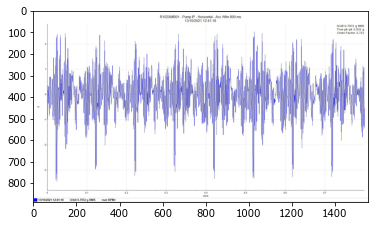

fault


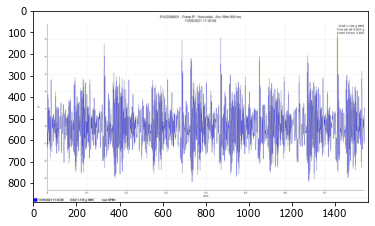

fault


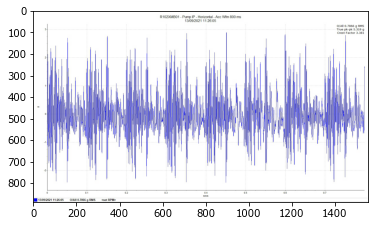

fault


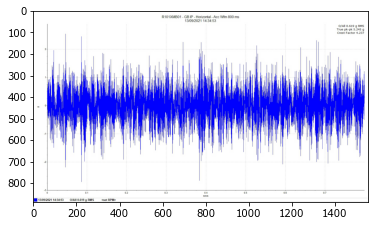

good


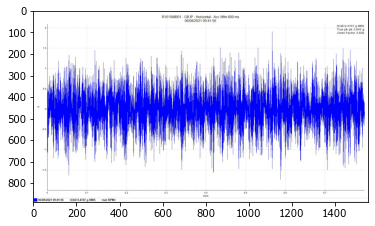

good


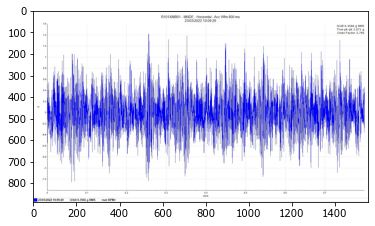

good


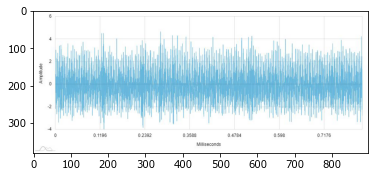

fault


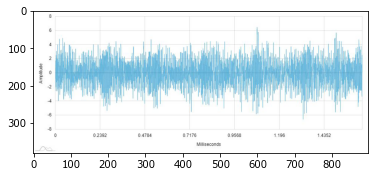

fault


In [20]:
def classifyimage(imagepath):
    test_image = image.load_img(imagepath, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = net.predict(test_image)  #modified to net
    training_set.class_indices             
    if result[0][0] == 1:
        prediction = 'good'
    else:
        prediction = 'fault'
    
    img = mpimg.imread(imagepath)
    plt.imshow(img)
    plt.show()
    print(prediction)

classifyimage('data/bearing_fault/fault_or_good_1.jpg')
classifyimage('data/bearing_fault/fault_or_good_2.jpg')
classifyimage('data/bearing_fault/fault_or_good_3.jpg')
classifyimage('data/bearing_fault/fault_or_good_4.jpg')
classifyimage('data/bearing_fault/fault_or_good_5.jpg')
classifyimage('data/bearing_fault/fault_or_good_6.jpg')
classifyimage('data/bearing_fault/fault_or_good_7.jpg')
classifyimage('data/bearing_fault/fault_or_good_8.jpg')

In [13]:
# define network topology
net = Sequential()

#Block 1
net.add(Conv2D( filters=32, kernel_size=3, activation="relu", input_shape=(64,64,3) ))
net.add(MaxPooling2D( pool_size= (2,2), strides= 2))

#Block 2, added and removed the input shape
net.add(Conv2D( filters=64, kernel_size=3, activation="relu",  ))
net.add(MaxPooling2D( pool_size= (2,2), strides= 2))

#Block 3, added and removed the input shape
net.add(Conv2D( filters=128, kernel_size=3, activation="relu",  ))
net.add(MaxPooling2D( pool_size= (2,2), strides= 2))

net.add(Flatten())
net.add(Dense( units=128, activation="relu" ))
net.add(Dense( units=1, activation="sigmoid" ))

net.compile(optimizer = "Adam", loss = tf.keras.losses.BinaryCrossentropy(), metrics = 'accuracy')

In [14]:
net.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [16]:
net.fit_generator( training_set, epochs=3 )

Epoch 1/3
192/192 [==============================] - 84s 437ms/step - loss: 1.0069e-08 - accuracy: 1.0000
Epoch 2/3
192/192 [==============================] - 104s 541ms/step - loss: 5.6595e-09 - accuracy: 1.0000
Epoch 3/3
192/192 [==============================] - 99s 515ms/step - loss: 3.6190e-09 - accuracy: 1.0000


**Comments:**

I know this is overfitting, possibly because I reproduce the same image to train.

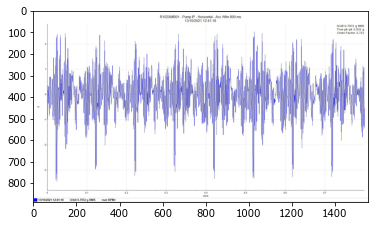

fault


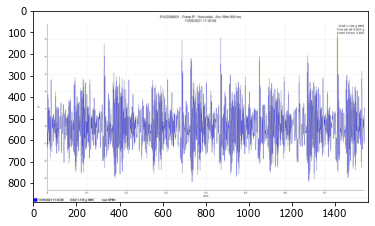

fault


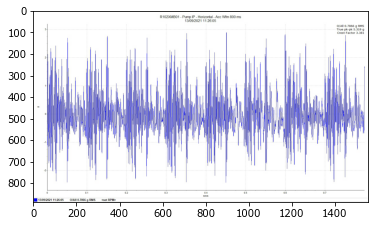

fault


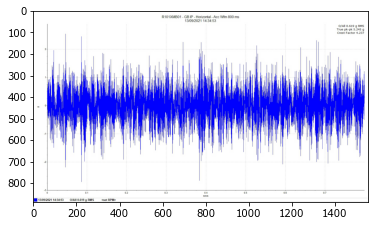

good


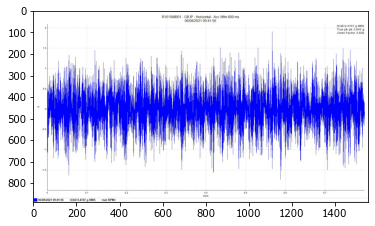

good


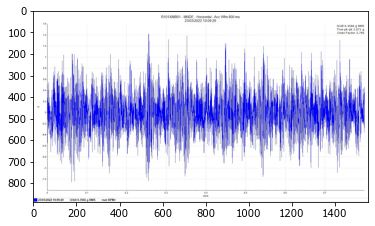

good


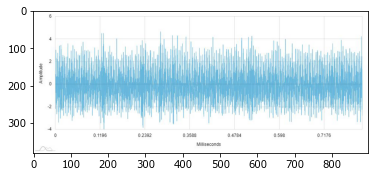

fault


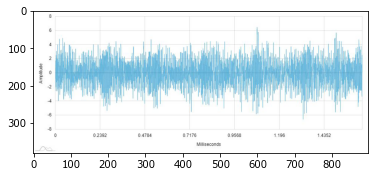

fault


In [21]:
def classifyimage(imagepath):
    test_image = image.load_img(imagepath, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = net.predict(test_image)  #modified to net
    training_set.class_indices             
    if result[0][0] == 1:
        prediction = 'good'
    else:
        prediction = 'fault'
    
    img = mpimg.imread(imagepath)
    plt.imshow(img)
    plt.show()
    print(prediction)

classifyimage('data/bearing_fault/fault_or_good_1.jpg')
classifyimage('data/bearing_fault/fault_or_good_2.jpg')
classifyimage('data/bearing_fault/fault_or_good_3.jpg')
classifyimage('data/bearing_fault/fault_or_good_4.jpg')
classifyimage('data/bearing_fault/fault_or_good_5.jpg')
classifyimage('data/bearing_fault/fault_or_good_6.jpg')
classifyimage('data/bearing_fault/fault_or_good_7.jpg')
classifyimage('data/bearing_fault/fault_or_good_8.jpg')